<h1>Naive Bayes</h1>

In [10]:
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from IPython.display import HTML
%matplotlib inline

In [2]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 1000)
    x2s = np.linspace(axes[2], axes[3], 1000)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0', '#B22222'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50', '#FF0000'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        y = y.ravel()
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.plot(X[:, 0][y==3], X[:, 1][y==3], "r*")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [3]:
class GaussianNaiveBayes:
    """
    Bayes' theorem: P(Y|X) = (P(X|Y) * P(Y)) / P(X)
    """
    def fit(self, x, y):
        self.x, self.y = x, y
        self.params = defaultdict(dict)
        self.classes = np.unique(y)
        for class_ in self.classes:
            subsample = self.x[(self.y == class_).ravel()]  # subsample X|Y for each class
            self.params[class_]['mean'] = np.mean(subsample, axis=0)  # mean for each feature
            self.params[class_]['var'] = np.var(subsample, axis=0)  # variance for each feature
            self.params[class_]['p_y'] = self._p_y(class_)  # P(Y)
    
    def _p_y(self, c):
        """
        P(Y) - probability of the class c
        """
        return np.mean(self.y == c)
    
    def _p_x_y(self, sample, mean, var):
        """
        P(X|Y) - gaussian probability of the X's in condition of class Y
        """
        eps = 1e-6
        coef = 1 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(-(sample - mean) ** 2 / (2 * var + eps)) 
        return coef * exponent
    
    def _predict_sample(self, sample):
        sample = sample.ravel()
        classes_p_y_x = []
        for class_ in self.classes:
            p_y = self.params[class_]['p_y']
            mean = self.params[class_]['mean']
            var = self.params[class_]['var']
            p_x_y_s = self._p_x_y(sample, mean, var)  # P(X|Y) for each feature x in X
            p_x_y = 1
            for prob in p_x_y_s:  # multiply each probability, naive independecy
                p_x_y *= prob
                
            p_y_x = p_y * p_x_y  # bayes theorem, denominator ignored
            classes_p_y_x.append(p_y_x)
        return self.classes[np.argmax(classes_p_y_x)]
    
    def predict(self, x):
        result = [self._predict_sample(sample) for sample in x]
        return np.array(result)

In [4]:
x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=4,
    random_state=5,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=10,
    hypercube=False
)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
nb = GaussianNaiveBayes()
nb.fit(x_train, y_train)

In [7]:
accuracy_score(y_test.ravel(), nb.predict(x_test))

0.9212121212121213

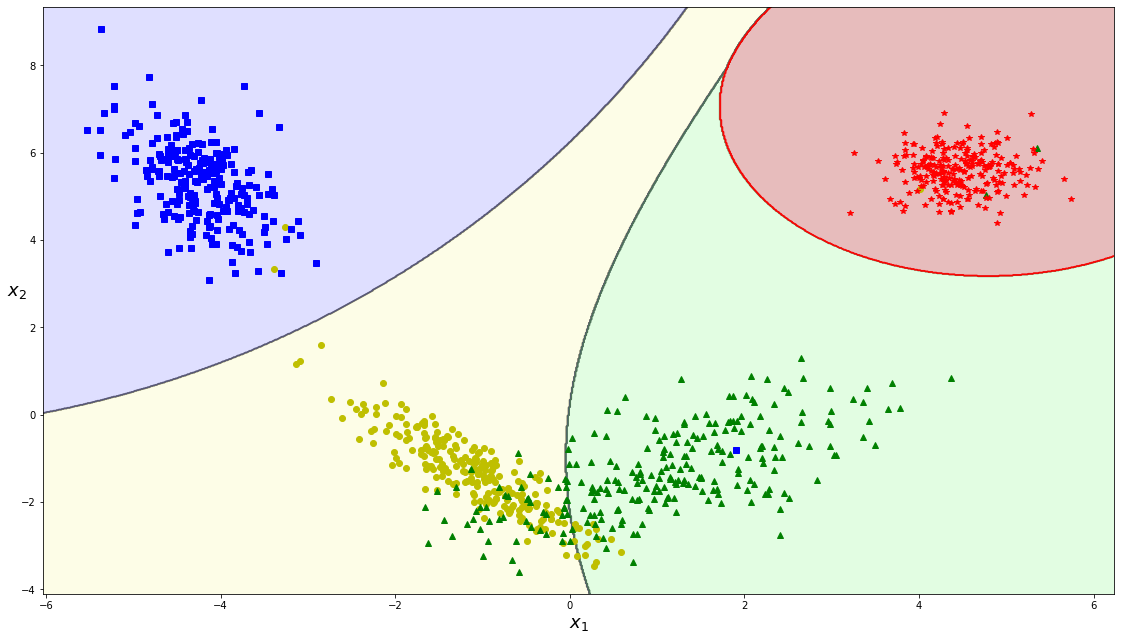

In [8]:
plt.figure(figsize=(19.20, 10.80))
plot_decision_boundary(nb, x, y, axes = [x[:, 0].min() - 0.5, x[:, 0].max() + 0.5,
                                         x[:, 1].min() - 0.5, x[:, 1].max() + 0.5])

plt.show()

In [9]:
with open('./style.css', 'r') as f:
    style = f.read()
HTML(style)